In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [4]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Fri Jun 17 22:30:49 +0000 2022',
 'id': 1537925763004891136,
 'id_str': '1537925763004891136',
 'full_text': "@infinitemagnus1 @AlessandroDEtt9 @realchrisrufo I'm conservative. I conserve water, gas and insults towards others. But I do. I ride an electric bike.",
 'truncated': False,
 'display_text_range': [49, 151],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'infinitemagnus1',
    'name': 'This is not the hill to die on',
    'id': 969338554902917120,
    'id_str': '969338554902917120',
    'indices': [0, 16]},
   {'screen_name': 'AlessandroDEtt9',
    'name': "Alessandro D'Ettorre",
    'id': 1405838940599369730,
    'id_str': '1405838940599369730',
    'indices': [17, 33]},
   {'screen_name': 'realchrisrufo',
    'name': 'Christopher F. Rufo ⚔️',
    'id': 3066800573,
    'id_str': '3066800573',
    'indices': [34, 48]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http

In [5]:
data[0]['full_text']

"@infinitemagnus1 @AlessandroDEtt9 @realchrisrufo I'm conservative. I conserve water, gas and insults towards others. But I do. I ride an electric bike."

In [6]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...
1,2nd hand electric bicycle \nrepaired \nbrand n...
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...
3,My new ebike is smooth...\n\nBut the bike seat...
4,@supcat I can't fault them. Both Yamaha and I ...
...,...
1995,"Two videos this week. Tonight, we review an e..."
1996,This is bang on. And I am sad some degenerate ...
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...


In [7]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety
...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1


In [8]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [9]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville,infinitemagnus1 alessandrodett9 realchrisrufo ...
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite,2nd hand electric bicycle repaired brand new tire
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow,tracyswartz rainiermarquez chifamilybiking web...
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule,new ebike smooth bike seat firm ass
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety,supcat ca fault yamaha think bosch make ebike ...
...,...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners,two videos week tonight review ebike borrowed ...
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood,bang sad degenerate stole guys ebike cycling k...
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike,wolf king gt back stock ebikeplus ottawa minim...
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1,gocycles gx ebike bromptonalternative


In [10]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,@infinitemagnus1 @AlessandroDEtt9 @realchrisru...,0,0,markareedaville,infinitemagnus1 alessandrodett9 realchrisrufo ...,0.000000,0.000000
1,2nd hand electric bicycle \nrepaired \nbrand n...,0,0,santasanunite,2nd hand electric bicycle repaired brand new tire,0.068182,0.227273
2,@tracyswartz @rainiermarquez @ChiFamilyBiking ...,0,1,bikegridnow,tracyswartz rainiermarquez chifamilybiking web...,0.000000,0.100000
3,My new ebike is smooth...\n\nBut the bike seat...,0,0,Master0fHyrule,new ebike smooth bike seat firm ass,0.112121,0.451515
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety,supcat ca fault yamaha think bosch make ebike ...,0.000000,0.000000
...,...,...,...,...,...,...,...
1995,"Two videos this week. Tonight, we review an e...",0,7,CCampervanners,two videos week tonight review ebike borrowed ...,0.250000,0.533333
1996,This is bang on. And I am sad some degenerate ...,0,3,JoelWWood,bang sad degenerate stole guys ebike cycling k...,-0.750000,1.000000
1997,The Wolf King GT\nNow Back IN STOCK\n\n#ebikep...,0,0,plus_ebike,wolf king gt back stock ebikeplus ottawa minim...,0.000000,0.000000
1998,Gocycle’s GX Ebike Is A Fast-folding Brompton ...,0,0,wwwcurrentnews1,gocycles gx ebike bromptonalternative,0.000000,0.000000


In [11]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['bosch', 'eleglide', 'shimano', 'trek', 'rad', 'aventon', 'specialized']

In [12]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,bosch
1,eleglide
2,shimano
3,trek
4,rad
5,aventon
6,specialized


In [13]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("bosch")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
4,@supcat I can't fault them. Both Yamaha and I ...,0,0,RwlSociety,supcat ca fault yamaha think bosch make ebike ...,0.000000,0.000000
332,Here's an excellent 2018 Gazelle Arroyo for $2...,1,0,urbncycle,excellent 2018 gazelle arroyo bosch 347 miles ...,1.000000,1.000000
404,A bike for all situations. \n\nThe Kalkhoff En...,0,0,espokescycles,bike situations kalkhoff endeavour move ebike ...,0.150000,0.500000
1296,Read more about what makes Bosch the industry-...,0,5,LdnOntBikeCafe,read makes bosch feature system could certainl...,0.214286,0.571429
1328,"Looking for more ride, less drive, time, but e...",0,2,Diamondbackbike,looking ride less drive time every bike brand ...,0.246667,0.433333
1331,Together for more #sustainability: Some 100 Bo...,64,1171,BoschGlobal,together sustainability 100 bosch associates g...,0.066667,0.483333
1480,"Last weekend, Whyte rider @endurobiker secured...",1,5,WhyteBikes,last weekend whyte rider endurobiker secured w...,0.000000,0.066667
1557,@ThisIsBrucifer @LBGAmbScotland @Charlie722700...,0,1,dmstorr,thisisbrucifer lbgambscotland charlie72270080 ...,0.500000,0.500000
1942,Are you starting to think about a new #EBike a...,6,24,ternbicycles,starting think new ebike surprised price diffe...,0.127273,0.510909


In [14]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [15]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,bosch,0.256099
1,eleglide,0.212500
2,shimano,0.201034
3,trek,0.187273
4,rad,0.140523
5,aventon,0.117857
6,specialized,0.302462


In [16]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1018,Wrangell is the perfect island for an ebike! \...,0,1,planet_alaska,wrangell perfect island ebike alaska alaskan w...,1.0,1.0
1719,Ebike Reviews at Ebike Legends for Lovers of E...,0,0,ChallengeServer,ebike reviews ebike legends lovers electric bi...,1.0,0.3
1961,@BaselCars @winkybiker I was impressed with th...,0,1,stickers66,baselcars winkybiker impressed ebike uptake ma...,1.0,1.0
1768,Ebike Reviews at Ebike Legends for Lovers of E...,0,0,PressRelease_cc,ebike reviews ebike legends lovers electric bi...,1.0,0.3
1776,#Ride1Up has an #eBike for you ... check out t...,0,0,OleSmokinSteve,ride1up ebike check awesome lineup hoot ride,1.0,1.0
1783,The PERFECT gift for Dad this Father’s Day! Co...,0,0,SpencerAircraft,perfect gift dad fathers day come see selectio...,1.0,1.0
1241,"Take transit, ebike, e scooter, electric vehic...",0,1,chrisw442,take transit ebike e scooter electric vehicle ...,1.0,0.3
916,🚴‍DYU S2 Mini Folding E-bike is designed with ...,1,2,DYUofficial,dyu s2 mini folding designed one way ride thro...,1.0,1.0
73,@Cernovich Electric bike take care of knee iss...,0,0,StuffIsn,cernovich electric bike take care knee issues ...,1.0,0.3
1894,10 Best Folding Electric Bikes 2022 | Best Fol...,1,1,productisland,10 best folding electric bikes 2022 best folda...,1.0,0.3


In [17]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1331,Together for more #sustainability: Some 100 Bo...,64,1171,BoschGlobal,together sustainability 100 bosch associates g...,0.066667,0.483333
1615,Our friends with @Green13Toronto &amp; @ParkHP...,22,13,BikewaysTO,friends green13toronto parkhp4climate hosting ...,0.000000,0.000000
879,Colorado just became the national leader on st...,22,122,00Piep,colorado became national leader state ebike in...,0.000000,0.000000
1732,Consider this an open invitation: if you live ...,21,214,emily_wk,consider open invitation live pittsburgh would...,0.156061,0.608333
1979,REI is starting to sell some really nicely spe...,20,274,akgerber,rei starting sell really nicely spec lights hy...,0.082500,0.340000
363,Nice #electric bike seen at #vivatech #innovat...,17,22,Nicochan33,nice electric bike seen vivatech innovation di...,0.600000,1.000000
1503,It’s been a blast working with the team @skarp...,16,144,chrishoy,blast working team skarperofficial last couple...,0.125000,0.391270
1086,Too many things to mention. Riding Lorraine's ...,13,90,anneramsey740,many things mention riding lorraine pendleton ...,-0.083333,0.653333
270,- Getting rid of my old regular bike &amp; buy...,13,119,anasalhajji,getting rid old regular bike buying electric b...,-0.025000,0.394231
948,"Come and check out our foldable ebike ,it can ...",13,98,EmobilityK,come check foldable ebike fit booth saloon car,0.400000,0.400000


In [18]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)['user']

1331      BoschGlobal
1615       BikewaysTO
879            00Piep
1732         emily_wk
1979         akgerber
363        Nicochan33
1503         chrishoy
1086    anneramsey740
270       anasalhajji
948        EmobilityK
Name: user, dtype: object

In [19]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

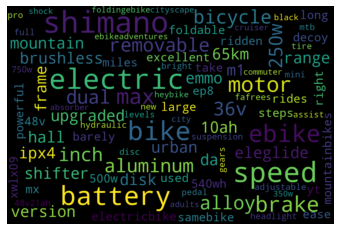

In [20]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'shimano'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()